In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smooth
import math
from math import dist
import time

import cv2

import random
from IPython import display
# aka import ipympl




In [2]:
folder = "processed_TOF_data/D150cm_d5cm_320ns_Threshold_80_50/"
neutron_signal_1 =np.loadtxt(folder+"20221222_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_24hours.txt")

neutron_signal_2  =np.loadtxt(folder+"20221229_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt")
neutron_signal_3  =np.loadtxt(folder+"20221230_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_4hours.txt")
neutron_signal_4  =np.loadtxt(folder+"20221230_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_4hours_2.txt")
neutron_signal_5  =np.loadtxt(folder+"20220101_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_24hours.txt")
neutron_signal_6  =np.loadtxt(folder+"20220102_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_20hours.txt")
neutron_signal_7  =np.loadtxt(folder+"20220103_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt")
neutron_signal_8  =np.loadtxt(folder+"20220105_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt") # 90
neutron_signal_9  =np.loadtxt(folder+"20220105_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours_2.txt")
neutron_signal_10 =np.loadtxt(folder+"20220106_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt")
neutron_signal_11 =np.loadtxt(folder+"20220106_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours_2.txt") # 114
neutron_signal_12 =np.loadtxt(folder+"20220107_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt")# 126
neutron_signal_13 =np.loadtxt(folder+"20220107_TOF_TH80_D150d5cm_N_woPSD_g1g2_wPSD_18hours.txt")# 144
neutron_signal = np.zeros(shape=4)
print(neutron_signal)
for i in range(1,14):
    add = locals()["neutron_signal_"+str(i)]  # convert string to variable name
    neutron_signal=np.vstack((neutron_signal,add))


print("time differnet   PSD.        Energy       trigger_channel")
print(neutron_signal)
print(len(neutron_signal))
print(neutron_signal.shape)

[0. 0. 0. 0.]
time differnet   PSD.        Energy       trigger_channel
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 4.56200e+00  2.09991e-01  1.08100e+03  6.00000e+00]
 [ 2.25750e+02  2.81713e-01  6.07000e+02  6.00000e+00]
 ...
 [ 6.78880e+01  3.94879e-01  1.48400e+03  4.00000e+00]
 [-2.00120e+02  2.42023e-01  3.85500e+03  4.00000e+00]
 [-1.10968e+02  2.37149e-01  1.45900e+03  4.00000e+00]]
10057
(10057, 4)


In [3]:
lower =-1
upper =0
for i in range(len(neutron_signal[:]) ):
    if (neutron_signal[i][0]) <=upper and (neutron_signal[i][0])>=lower:
        print((neutron_signal[i]))

[0. 0. 0. 0.]
[-4.0600e-01  1.8711e-01  4.8100e+02  4.0000e+00]
[-8.92000e-01  2.39607e-01  2.23700e+03  6.00000e+00]
[-5.80000e-01  1.61692e-01  8.04000e+02  6.00000e+00]
[-4.52000e-01  2.40093e-01  1.71600e+03  4.00000e+00]
[-4.64000e-01  3.11656e-01  8.15000e+02  4.00000e+00]
[-6.40000e-02  2.44174e-01  9.87000e+02  4.00000e+00]
[-6.80000e-01  2.36748e-01  2.22600e+03  6.00000e+00]
[-1.92000e-01  2.50529e-01  3.78000e+03  4.00000e+00]
[-5.92000e-01  2.54105e-01  2.55800e+03  4.00000e+00]
[-1.10000e-01  2.21408e-01  6.82000e+02  4.00000e+00]
[-9.08000e-01  2.56358e-01  4.87600e+03  4.00000e+00]
[-6.36000e-01  2.32127e-01  1.13300e+03  6.00000e+00]
[-9.68000e-01  2.10963e-01  6.02000e+02  6.00000e+00]
[-2.00000e-01  2.40778e-01  1.49100e+03  4.00000e+00]
[-1.40000e-01  2.48402e-01  4.69400e+03  6.00000e+00]
[-7.81000e-01  2.38426e-01  4.32000e+02  6.00000e+00]
[-1.2400e-01  3.0402e-01  7.9600e+02  4.0000e+00]
[-6.08000e-01  2.39964e-01  1.09600e+03  6.00000e+00]
[-5.48000e-01  2.23325

In [4]:
x_2D=np.array([])
y_2D=np.array([])
z_2D=np.array([])
for i in range(len(neutron_signal[:]) ):
    if neutron_signal[i][2]<10000:
        x_2D = np.append(x_2D,round(neutron_signal[i][0],3))
        y_2D = np.append(y_2D,round(neutron_signal[i][1],4))
        z_2D = np.append(z_2D,int(neutron_signal[i][2]))

In [5]:
#Signal processing

singal_processed = neutron_signal[neutron_signal[:,2]<10000]

neutron_signal_temp = singal_processed[singal_processed[:,1]<0.5]
neutron_PSD = neutron_signal_temp[neutron_signal_temp[:,1]>0.3]
print(singal_processed.shape)
print(neutron_PSD.shape)

(9863, 4)
(3162, 4)


In [6]:
def plot_func(input_1,input_2):
    plt.rc('font', family='Helvetica')         # 自型
    plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
    plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
    plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度
    
    fig = plt.figure(figsize=(8,6))        # 圖片大小
    ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
    
    plt.hist2d(input_1,input_2, bins=(400, 100),cmin=0, cmap=plt.cm.jet)
    ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
    ax.set_ylabel('PSD ',fontsize=18)
    
    plt.ylim(0.0,0.45)
    plt.xlim(-50,150)
    
    plt.show()

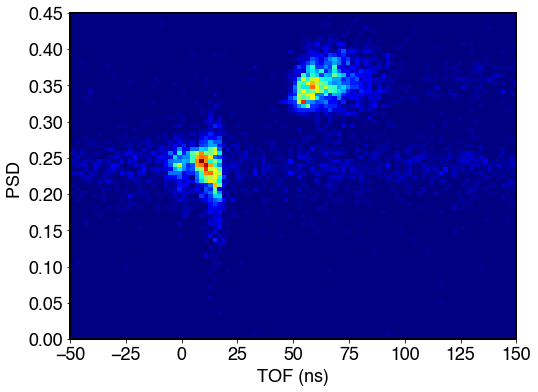

In [7]:
plot_func(singal_processed[:,0], singal_processed[:,1])

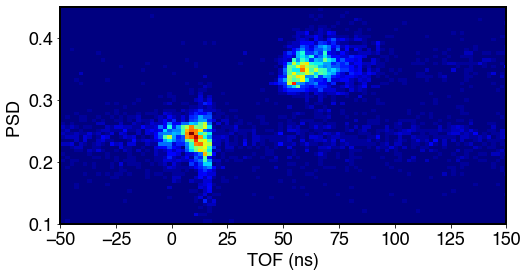

In [8]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(singal_processed[:,0], singal_processed[:,1], bins=(400, 100),cmin=0, cmap=plt.cm.jet)
ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_ylabel('PSD ',fontsize=18)

plt.ylim(0.1,0.45)
plt.xlim(-50,150)

plt.show()

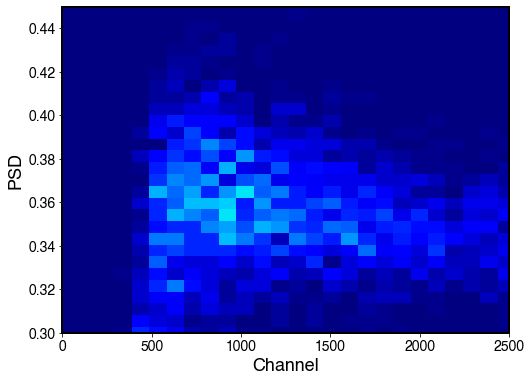

In [9]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(singal_processed[:,2],singal_processed[:,1], bins=(100, 100),cmin=0, cmap=plt.cm.jet)

ax.set_ylabel('PSD',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0.3,0.45)
plt.xlim(0,2500)
plt.show()

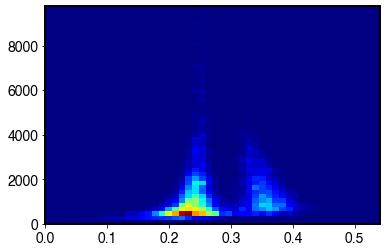

In [10]:
plt.hist2d(singal_processed[:,1],singal_processed[:,2], bins=(50, 50), cmap=plt.cm.jet)
plt.show()

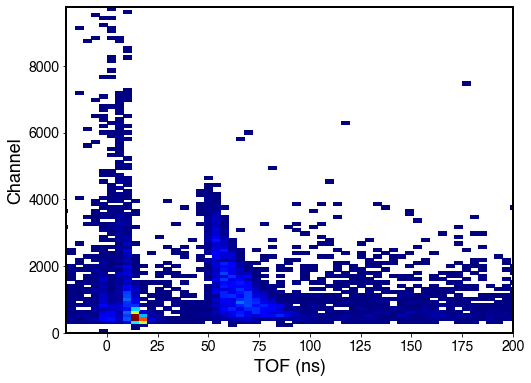

In [11]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

h=plt.hist2d(singal_processed[:,0],singal_processed[:,2], bins=(200, 100),cmin=1, cmap=plt.cm.jet)

ax.set_ylabel('Channel',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('TOF (ns)',fontsize=18)
plt.ylim(0,)
plt.xlim(-20,200)
plt.show()

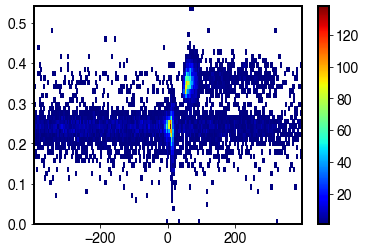

In [12]:
h= plt.hist2d(x_2D, y_2D, bins=(200, 50),cmin=1, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(125,140,2):
    ax.plot(h[0][int(i)],label = str(i*4-400)+'ns' )

    
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0,100)
plt.xlim(0,50)
plt.legend(fontsize = 18) 
plt.show()
 

In [13]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [14]:
bin_center, hist  = sorting(singal_processed[:,0],800,-400,400)
bin_center, hist_neutron = sorting(neutron_PSD[:,0],800,-400,400)

In [15]:
def fig_pre_def():
    plt.rc('font', family='Helvetica')         # 自型
    plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
    plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
    plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

    
def fig_post_def():

    # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
    
    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    
    ax.set_xlabel('TOF (ns)',fontsize=18)
    ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離

    plt.legend(fontsize=18)

(0.0, 199.5)

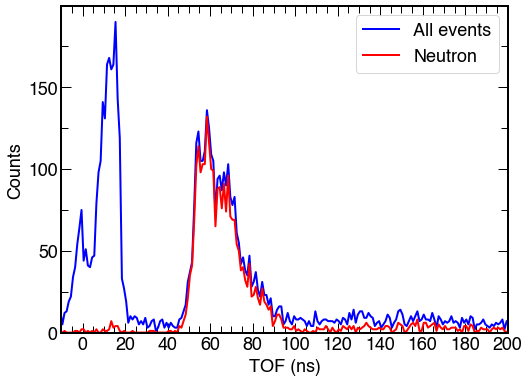

In [16]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(bin_center,hist,'b',linewidth=2,label ='All events')
ax.plot(bin_center,hist_neutron,'r' ,linewidth=2,label ='Neutron')

fig_post_def()
plt.xlim(-10,200)
plt.ylim(0,)

In [17]:
max_position = np.argmax(hist)
measured_gamma_coincidence= bin_center[max_position]
print(measured_gamma_coincidence)

15.5


In [18]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
gamma_to_3_cm_gamma_detector= (0.05/light_speed)/nano_second
print(gamma_to_3_cm_gamma_detector)

0.16678204203582592


In [19]:
gamma_to_150cm_enutron_detector = (1.5 / 299792458 )*10**9
print(gamma_to_150cm_enutron_detector,' ns')
ideal_gamma_coincidence = gamma_to_150cm_enutron_detector - gamma_to_3_cm_gamma_detector
system_delay = measured_gamma_coincidence - ideal_gamma_coincidence
print('system_delay  ',system_delay)



5.00346142797228  ns
system_delay   10.663320614063545


In [20]:
axis, hist_corr  = sorting(singal_processed[:,0]-system_delay+gamma_to_3_cm_gamma_detector,800,-400,400)
axis, hist_neutron_corr = sorting(neutron_PSD[:,0]-system_delay+gamma_to_3_cm_gamma_detector,800,-400,400)

(0.0, 195.3)

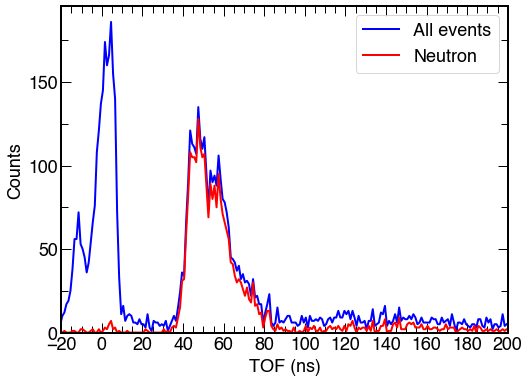

In [21]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(axis, hist_corr  ,'b',linewidth=2,label ='All events')
ax.plot(axis, hist_neutron_corr,'r' ,linewidth=2,label ='Neutron')


fig_post_def()
plt.xlim(-20,200)
plt.ylim(0,)

(0.0, 199.5)

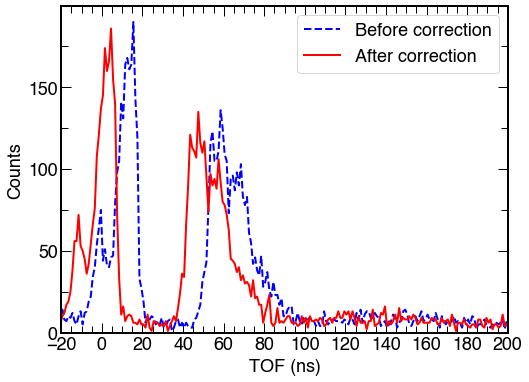

In [60]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(bin_center,hist,'--b',linewidth=2,label ='Before correction')
ax.plot(axis, hist_corr  ,'r',linewidth=2,label ='After correction')



fig_post_def()
plt.xlim(-20,200)
plt.ylim(0,)

In [80]:
print(type(neutron_PSD))

<class 'numpy.ndarray'>


In [101]:
# Time to energy
def Time_to_energy(TOF):
    distance = 1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
    
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy

In [102]:
Neutron_TOF = neutron_PSD[:,0]-system_delay+gamma_to_3_cm_gamma_detector
print(Neutron_TOF)

[156.40946143   2.53346143  63.51846143 ...  63.22346143 180.06346143
  57.39146143]


In [103]:
print(len(Neutron_TOF))
Neutron_TOF_temp = Neutron_TOF.copy()
Neutron_TOF_temp_2= Neutron_TOF_temp[Neutron_TOF_temp>30] # choose >30 ns
Neutron_TOF_filtered = Neutron_TOF_temp_2[Neutron_TOF_temp_2<100] #choose <100 ns
print(len(Neutron_TOF_filtered))

3162
2503


In [104]:
Neutron_energy_raw = Time_to_energy(Neutron_TOF_filtered)
print(Neutron_energy_raw)

[2.88457777 3.2358851  3.31349667 ... 5.10689227 2.91168687 3.5370817 ]


In [66]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 10 # 10 MeV
Binning = 50 # cut to 100 pieces
Neutron_E_axis, Neutron_energy_counts = sorting(
    Neutron_energy_raw, Binning , Neutron_energy_lower, Neutron_energy_upper)

In [71]:
def fig_pre_def():
    plt.rc('font', family='Helvetica')         # 自型
    plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
    plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
    plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

    
def fig_post_def():

    # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
    
    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    
    ax.set_xlabel('Energy (MeV)',fontsize=18)
    ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離

    plt.legend(fontsize=18)

In [ ]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
ax.plot([],[] ,' ', label= 'Bin = 0.2 MeV')
#ax.plot(Neutron_E_axis, Neutron_energy_counts,'b', label= 'non-corrected efficiency')
ax.hist(Neutron_energy_raw,bins=50,edgecolor='black',range=(0,10), label= 'non-corrected\nefficiency')

fig_post_def()

plt.xlim(0,10)
plt.ylim(0,)

In [21]:
# Time to energy
def Time_to_energy(TOF):
    distance = 1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    beta= distance/(light_speed*TOF*10**-9)
    
    neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy

In [75]:
print(Time_to_energy(50))

4.66865846839568


In [76]:
E_axis = Time_to_energy(axis[410:500])

Text(0, 0.5, 'Counts')

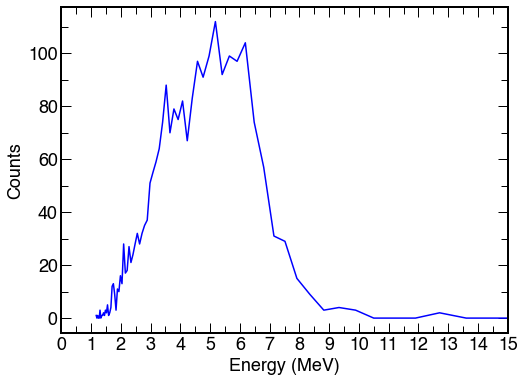

In [78]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


plt.plot(E_axis,hist_neutron_corr[410:500],'b',label = '')
plt.xlim(0,15)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('Energy (MeV)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離

In [ ]:
E=m*ma.pow(c,2)*((1/(ma.pow(b,0.5)))-1)/1.602/ma.pow(10,-13)

In [621]:
folder = "processed_TOF_data/D150cm_d5cm_320ns_Threshold_50_35/"
neutron_signal_5035_1 =np.loadtxt(folder+"20220103_TOF_TH50_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt")

neutron_signal_5035 = np.zeros(shape=4)
print(neutron_signal_5035)
for i in range(1,2):
    add = locals()["neutron_signal_5035_"+str(i)]  # convert string to variable name
    neutron_signal_5035=np.vstack((neutron_signal_5035,add))


print("time differnet   PSD.        Energy       trigger_channel")
print(neutron_signal_5035)
print(len(neutron_signal_5035))
print(neutron_signal_5035.shape)



[0. 0. 0. 0.]
time differnet   PSD.        Energy       trigger_channel
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 3.15203e+02  2.43003e-01  7.86000e+02  6.00000e+00]
 [-2.99900e+00  2.53240e-01  1.00300e+03  6.00000e+00]
 ...
 [ 1.72320e+01  1.81102e-01  2.54000e+02  4.00000e+00]
 [ 8.36080e+01  2.43049e-01  7.66100e+03  4.00000e+00]
 [ 3.01592e+02  2.40180e-01  8.91000e+02  6.00000e+00]]
1178
(1178, 4)


In [ ]:
#Signal processing

singal_processed = neutron_signal[neutron_signal[:,2]<10000]

neutron_signal_temp = singal_processed[singal_processed[:,1]<0.5]
neutron_PSD = neutron_signal_temp[neutron_signal_temp[:,1]>0.3]
print(singal_processed.shape)
print(neutron_PSD.shape)

In [ ]:
neutron_signal_8

In [624]:
hist_8050, bin_center_8050 = sorting(neutron_signal_8[:,0],400,-400,400)
hist_5035, bin_center_5035 = sorting(neutron_signal_5035[:,0],400,-400,400)
#hist_neutron, bin_center = sorting(neutron_PSD[:,0],400,-400,400)

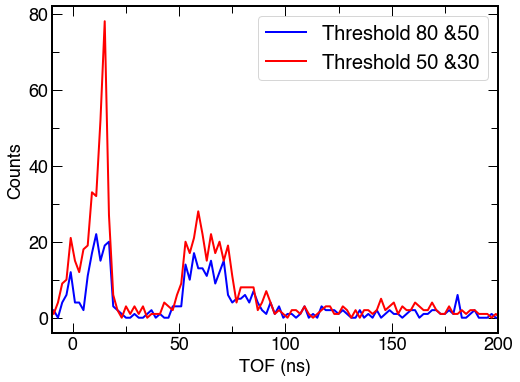

In [639]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(bin_center_8050,hist_8050,'b',linewidth=2,label ='Threshold 80 &50')
ax.plot(bin_center_5035,hist_5035,'r' ,linewidth=2,label ='Threshold 50 &30')


    # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('TOF (ns)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
plt.xlim(-10,200)
plt.legend(fontsize =20)

In [493]:
bin_number=400    #切幾格
bin_width=2    #每格大小
hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    x_2D, #要分析的矩陣
    bins=bin_number, 
    range=(-400, 400), #範圍
    density=False) #是否Normalized成百分比

pr=400-2
print(edges[pr],edges[pr+1],hist[pr])

#print(len(hist),len(edges))
#print(hist)
#print(edges)
#print(edges[3])

In [494]:
Bin_center = []
for i in range(len(edges)-1):
    #print(i)
    Bin_center_single = round((edges[i]+edges[i+1])/2,2)
    Bin_center = np.append(Bin_center,Bin_center_single)
#print(Bin_center)

plt.plot(Bin_center,hist,'.')
plt.xlim(-5,10)
#plt.yscale('log')

(-10.0, 200.0)

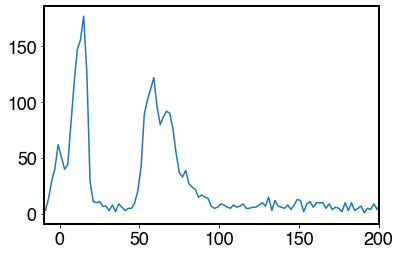

In [495]:
plt.plot(Bin_center,hist)
plt.xlim(-10,200)

In [386]:
hist1=hist

(-10.0, 200.0)

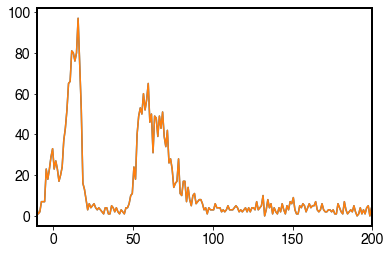

In [387]:
plt.plot(Bin_center,hist1)
plt.plot(Bin_center,hist)
plt.xlim(-10,200)

In [286]:
print(sum(hist[225:275]))
print(sum(hist1[225:275]))

206
337


In [289]:
print(sum(hist[200:210]))
print(sum(hist1[200:210]))

140
281


In [79]:
neutron_signal_n =np.loadtxt("20211222_TOF_N_wPSD_g1g2_wPSD.txt")

In [81]:
x_2D_n=np.array([])
y_2D_n=np.array([])
z_2D_n=np.array([])
for i in range(len(neutron_signal_n[:]) ):
    x_2D_n = np.append(x_2D_n,int(neutron_signal_n[i][0]))
    y_2D_n = np.append(y_2D_n,round(neutron_signal_n[i][1],4))
    z_2D_n = np.append(z_2D_n,int(neutron_signal_n[i][2]))

In [97]:
bin_number=400    #切幾格
bin_width=1    #每格大小
hist_n, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    x_2D_n, #要分析的矩陣
    bins=bin_number, 
    range=(-400, 400), #範圍
    density=False) #是否Normalized成百分比

In [98]:
Bin_center = []
for i in range(len(edges)-1):
    #print(i)
    Bin_center_single = round((edges[i]+edges[i+1])/2,2)
    Bin_center = np.append(Bin_center,Bin_center_single)
#print(Bin_center)

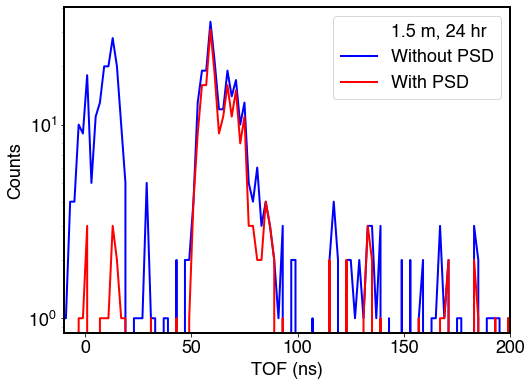

In [118]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot([],[],' ',label = '1.5 m, 24 hr')
plt.plot(Bin_center,hist,'b',linewidth=2,label = 'Without PSD')
plt.plot(Bin_center,hist_n,'r',linewidth=2,label = 'With PSD')


ax.set_xlabel('TOF (ns)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
#plt.ylim(0,)
plt.xlim(-10,200)
plt.legend(fontsize=18)
plt.yscale('log')
plt.show()





In [3]:
g1_PSD     =np.array([])
g1_TOF     =np.array([])
g1_charge  =np.array([])
g2_PSD     =np.array([])
g2_TOF     =np.array([])
g2_charge  =np.array([])

In [24]:

for i in range(1000):
    g1_PSD     =np.append(g1_PSD,    random.uniform(0.1,0.3))
    g1_TOF     =np.append(g1_TOF,    random.uniform(-10,10))
    g1_charge  =np.append(g1_charge, random.uniform(0,1000))
    
    g2_PSD     =np.append(g2_PSD, random.uniform(0.4,0.5))
    g2_TOF     =np.append(g2_TOF, random.uniform(100,100))
    g2_charge  =np.append(g2_charge, random.uniform(0,1000))

In [4]:

g1_PSD     = np.random.normal(0.2,0.05,1000)
#g1_TOF     = np.random.normal(0,50,1000)

g2_PSD     = np.random.normal(0.5,0.02,1000)
g2_TOF     = np.random.normal(100,5,1000)
for i in range(1000):
    g1_TOF     =np.append(g1_TOF, random.uniform(0,120))
    g1_charge  =np.append(g1_charge, random.uniform(0,1000))
    g2_charge  =np.append(g2_charge, random.uniform(0,1000))

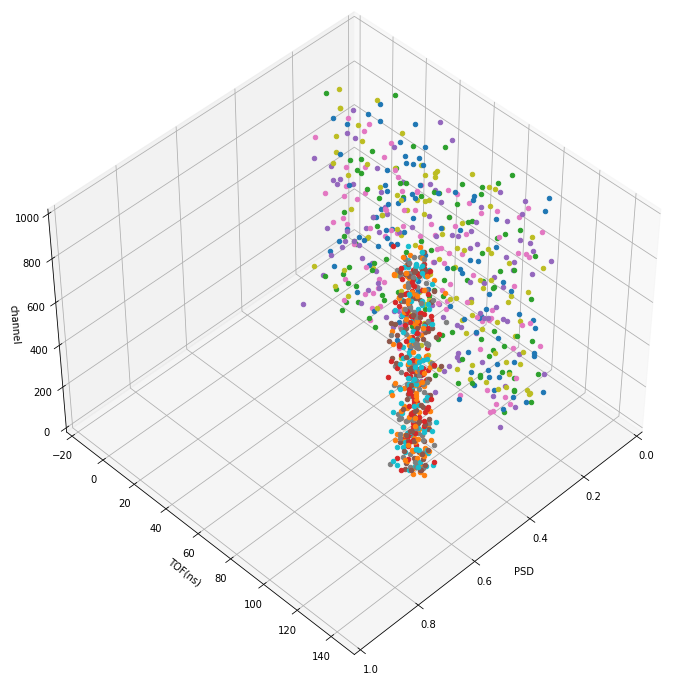

In [17]:
from matplotlib import interactive
interactive(True)


fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection='3d')

for i in range(500):
    ax.scatter(g1_PSD[i], g1_TOF[i], g1_charge[i])
    ax.scatter(g2_PSD[i], g2_TOF[i], g2_charge[i])

#ax.set_adjustable('box')
ax.set_xlim3d(0,1)
ax.set_ylim3d(-20,150)
ax.set_zlim3d(0,1000)

#ax.set_xticks(0,1)
ax.set_xlabel('PSD')
ax.set_ylabel('TOF(ns)')
ax.set_zlabel('channel')
ax.view_init(45, 45)
 
plt.show()